In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [3]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # Start with K=3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# List to store accuracy for different values of K
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"K={k}, Accuracy={accuracy:.2f}")

K=1, Accuracy=0.97
K=2, Accuracy=1.00
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


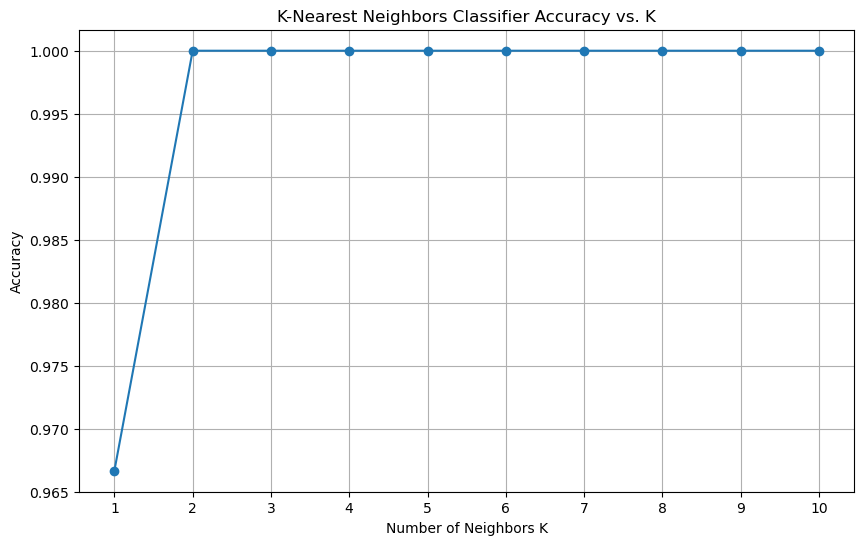

In [8]:
# Plotting the accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Nearest Neighbors Classifier Accuracy vs. K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [9]:
# Choose the best K (for example, K=3 based on previous results)
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

In [10]:
# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best K={best_k}, Accuracy={accuracy_best:.2f}")

Best K=3, Accuracy=1.00


In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_normalized[:, 0].min() - 1, X_normalized[:, 0].max() + 1
y_min, y_max = X_normalized[:, 1].min() - 1, X_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [13]:
# Predict the class for each point in the mesh grid
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

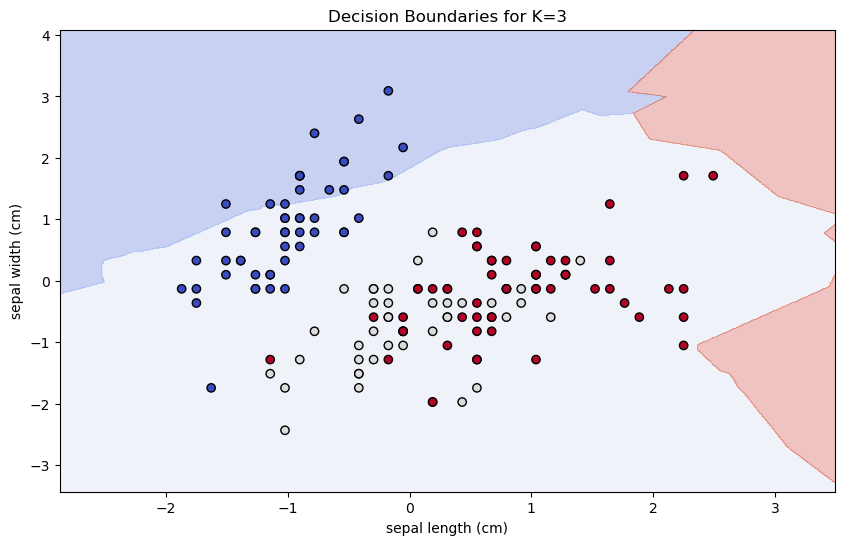

In [14]:
# Plotting the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title(f'Decision Boundaries for K={best_k}')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()